In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from IPython.display import Image
import matplotlib as mpl
from pylab import cm
import time 
from datetime import date

In [3]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)


In [4]:
today = date.today()
date_string = date.isoformat(today)
date_string

'2022-07-29'

In [5]:
Spectra = pd.read_csv(r'IV+Spectra/2022-05-24Commercial_White1_Spectra.csv', sep='\t',skipfooter=1)
Spectra

<ipython-input-5-eec0b2c7e248>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  Spectra = pd.read_csv(r'IV+Spectra/2022-05-24Commercial_White1_Spectra.csv', sep='\t',skipfooter=1)


,# Wavelengths(nm),0.0V,0.1V,0.2V,0.30000000000000004V,0.4V,0.5V,0.6000000000000001V,0.7000000000000001V,0.8V,...,4.1000000000000005V,4.2V,4.3V,4.4V,4.5V,4.6000000000000005V,4.7V,4.800000000000001V,4.9V,5.0V
0,340.164536,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,340.542225,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,340.919883,0.0,25.745893,-67.875536,-30.426964,4.681071,-84.259286,-18.724286,-7.021607,-44.470179,...,70.216071,74.897143,32.767500,16.383750,-7.021607,49.151250,-7.021607,14.043214,7.021607,-37.448571
3,341.297510,0.0,-2.340536,2.340536,4.681071,-39.789107,46.810714,46.810714,-37.448571,16.383750,...,39.789107,4.681071,21.064821,35.108036,21.064821,9.362143,-30.426964,-7.021607,18.724286,-9.362143
4,341.675106,0.0,56.172857,14.043214,86.599821,2.340536,14.043214,7.021607,23.405357,21.064821,...,39.789107,14.043214,14.043214,18.724286,77.237679,2.340536,-2.340536,-23.405357,2.340536,21.064821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,1027.107316,0.0,-21.064821,23.405357,-4.681071,-81.918750,-91.280893,11.702679,-60.853929,-60.853929,...,-84.259286,-37.448571,-53.832321,-53.832321,-9.362143,-35.108036,-44.470179,-32.767500,-49.151250,-32.767500
2044,1027.392407,0.0,44.470179,53.832321,30.426964,81.918750,49.151250,-14.043214,72.556607,88.940357,...,32.767500,56.172857,60.853929,138.091607,42.129643,2.340536,56.172857,-21.064821,60.853929,35.108036
2045,1027.677438,0.0,-63.194464,7.021607,-23.405357,16.383750,-51.491786,-44.470179,18.724286,-39.789107,...,-14.043214,46.810714,-42.129643,-32.767500,-4.681071,7.021607,-23.405357,-30.426964,-18.724286,2.340536
2046,1027.962409,0.0,28.086429,28.086429,-2.340536,-30.426964,-14.043214,35.108036,79.578214,-11.702679,...,65.535000,28.086429,63.194464,-30.426964,-11.702679,-23.405357,-23.405357,-2.340536,28.086429,60.853929


In [6]:
Spectra = Spectra.to_numpy()
Spectra

array([[ 340.1645356 ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [ 340.54222492,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [ 340.91988309,    0.        ,   25.74589286, ...,   14.04321429,
           7.02160714,  -37.44857143],
       ...,
       [1027.67743786,    0.        ,  -63.19446429, ...,  -30.42696429,
         -18.72428571,    2.34053571],
       [1027.96240942,    0.        ,   28.08642857, ...,   -2.34053571,
          28.08642857,   60.85392857],
       [1028.24732143,    0.        ,   11.70267857, ...,   16.38375   ,
           2.34053571,   -9.36214286]])

In [7]:
IV_EL = pd.read_csv(r'IV+Spectra/2022-05-24Commercial_White1IV+photocurrent.csv', sep='\t')
IV_EL

,# Bias(V),Current(mA),Photocurrent(mA)
0,0.0,1.539478e-08,0.000000e+00
1,0.1,1.178328e-08,2.600000e-08
2,0.2,8.365890e-08,2.500000e-08
3,0.3,-3.847381e-08,8.800000e-08
4,0.4,4.779745e-08,5.300000e-08
5,0.5,3.350352e-08,1.000000e-08
6,0.6,1.880299e-08,4.100000e-08
7,0.7,2.032892e-08,2.100000e-08
8,0.8,2.297405e-08,1.120000e-07
9,0.9,1.712434e-08,1.530000e-07


In [8]:
IV_EL = IV_EL.to_numpy()

In [9]:
numpoints = len(IV_EL)
Sample_Name = 'CommercialWhite1'

In [10]:
plt.rc('font', family='Arial')
plt.rcParams['axes.linewidth'] = 2
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
plt.rcParams['font.size'] = 12

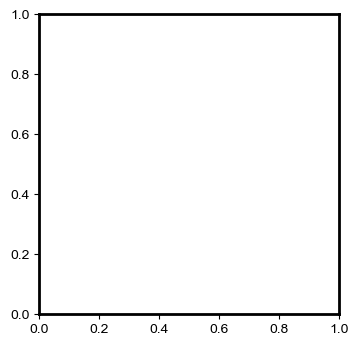

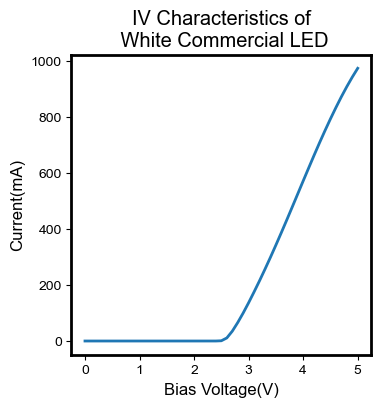

In [12]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(IV_EL[:,0],IV_EL[:,1],linewidth=2)

ax.set_xlabel('Bias Voltage(V)')
ax.set_ylabel('Current(mA)')
ax.set_title('IV Characteristics of\n White Commercial LED')
#ax.set_xlim(300,850)
#ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)
plt.show()

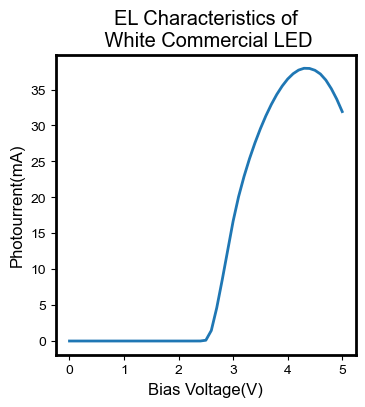

In [209]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(IV_EL[:,0],IV_EL[:,2],linewidth=2)

ax.set_xlabel('Bias Voltage(V)')
ax.set_ylabel('Photourrent(mA)')
ax.set_title('EL Characteristics of\n White Commercial LED')
#ax.set_xlim(300,850)
#ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)
plt.show()

In [142]:
Spectra_array[:,2]

array([0.0, 0.0, 25.74589285714296, ..., 28.08642857142854,
       11.702678571428576, nan], dtype=object)

In [143]:
#https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html
#https://matplotlib.org/3.5.0/tutorials/colors/colormap-manipulation.html
colors = cm.get_cmap('PuBu', 8)
print(colors(0.56))

(0.31596638655462184, 0.6067226890756302, 0.7781512605042017, 1.0)


In [178]:
Spectra[a,0]

'3.401645356000000220e+02'

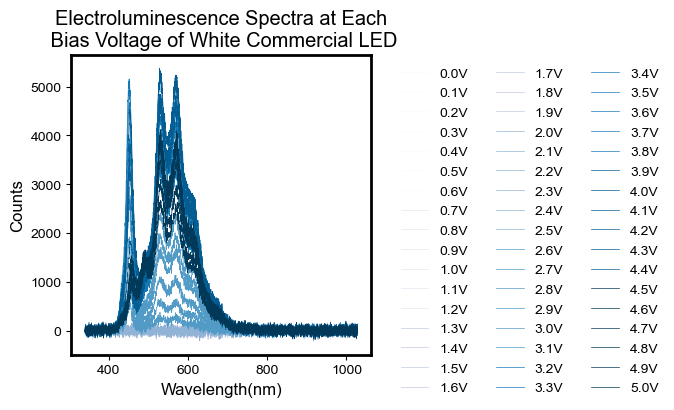

In [197]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

for k in range(numpoints):
    ax.plot(Spectra[:,0],Spectra[:,k+1],color = colors(k/numpoints), 
             label=f'{IV_EL[k,0]}V', linewidth = 0.5)

ax.set_xlabel('Wavelength(nm)')
ax.set_ylabel('Counts')
ax.set_title('Electroluminescence Spectra at Each\n Bias Voltage of White Commercial LED')
#ax.set_xlim(300,850)
ax.legend(bbox_to_anchor=(2, 1), loc=1, frameon=False, fontsize=10, ncol=3)
#ax.set_xticks(ax.get_xticks()[::5])
plt.show()

#plt.savefig(f'IV+Spectra/{date_string}{Sample_Name}_Spectra.png')

#### Best practices performance reporting according to Stranks, Rand et al. 
1. EQE vs J and Luminous efficacy/luminance vs J
2. J and luminance/radiance vs V (comment on max. achievable brightness and roll-off)
3. EL spectrum, wavelength of peak max and FWHM
4. Color coordinates (CIE) – only for visible emission
5. Correlated color temperature and color rendering index – only for white-light LEDs
6. Full details on calibration protocols, measurement setup (Physical dimensions of device, detector, distances between them; Assumptions regarding emission/collection profiles)
7. Operational stability (Emitted photons over time vs constant J)
8. Color stability (EL spectrum at t = 0 and t = final for fixed J)
![title](Picture1.png)

Commercial White LED Params
- Power: 1 Watt
- Forward Current: 350mA
- Forward Voltage: 3.0-3.2V
- Emitting Color: White
- Luminance: 120-130LM/W
- Color Temperature: 6000-6500K
- Color Rendering Index: ≥72Ra
- Bead Diameter: 8mm / 0.31inch
- Weight: approx. 1.2oz/100pcs

In [ ]:
#So the units of responsivity are A/W?

In [65]:
photodiode_directory= "PD_responsivities/20220409/PhotodiodeE_000"
f = open(photodiode_directory+".qsdat", "r")
print(f.read())

START HEADER:	QESRHeader
FileName:	"PhotodiodeE_000.qsdat"
Date:	"4/6/2022 3:21:20 PM"
Comment:	"340-1200nm, Z=8.83; OD=1"
DUTID:	"Unknown DUT"
DUTHash:	"-1"
BiasCondition:	"SHORT_CIRCUIT"
CalibrationFile:	"Cal_000.caldat"
SoftwareVersion:	"1.4.0.0"
StartWavelength:	"300"
StopWavelength:	"1100"
StepSize:	"1"
CartesianPosition:	"Unset"
MeasurementMode:	"AC"
ChopperState:	"30.00 Hz"
SourceSelection:	"Unset"
SourceName:	"Unset"
JscStandardFile:	"JscStd1.jstd"
END HEADER

START DATA:	[F3p-1] [E7p0] [F2p0] [E7p0] [G0p-1] [G0p-1]
Wavelength(λ)	Voltage(V)	EQE(%)	SR(A/W)	GratingIndex(#)	FilterIndex(#)
299.999	1.5287805E-004	19.40	4.6928572E-002	0	2
301.005	1.5716349E-004	19.37	4.7021520E-002	0	2
301.991	1.6274685E-004	19.44	4.7351125E-002	0	2
302.997	1.6776541E-004	19.48	4.7600285E-002	0	2
304.004	1.7357275E-004	19.62	4.8110104E-002	0	2
305.010	1.7927609E-004	19.77	4.8639339E-002	0	2
305.995	1.8438089E-004	19.87	4.9025828E-002	0	2
307.001	1.8971641E-004	19.99	4.9494362E-002	0	2
308.006	1.94704

In [66]:
#Converting Data portion of .qsdat file to txt form for pandas
stringA = "Wavelength("
stringB = 'END DATA'
file0 = open(photodiode_directory+".qsdat", "r")
file1 = open(photodiode_directory+".txt", "w")
i=0
j=0
k=0
for line in file0:  
    i+=1
    if stringA in line:
        print("Data starts line", i)
        j+=1
    if stringB in line:
        print("Data ends line", i)
        k+=1   
    if j==1 and k==0:
        file1 = open(Responsivity_directory+".txt", "a")
        file1.write(line)
        file1.close()

Data starts line 22
Data ends line 824


In [49]:
photodiode_data = pd.read_csv("PD_responsivities/20220409/PhotodiodeE_000.txt", delimiter='\t')
photodiode_data

,Wavelength(λ),Voltage(V),EQE(%),SR(A/W),GratingIndex(#),FilterIndex(#)
0,299.999,0.000153,19.40,0.046929,0,2
1,301.005,0.000157,19.37,0.047022,0,2
2,301.991,0.000163,19.44,0.047351,0,2
3,302.997,0.000168,19.48,0.047600,0,2
4,304.004,0.000174,19.62,0.048110,0,2
...,...,...,...,...,...,...
796,1095.995,0.000084,13.46,0.118983,1,4
797,1097.000,0.000078,13.37,0.118266,1,4
798,1098.004,0.000070,12.38,0.109597,1,4
799,1099.007,0.000072,12.81,0.113566,1,4


In [125]:
photodiode_data=photodiode_data.to_numpy()

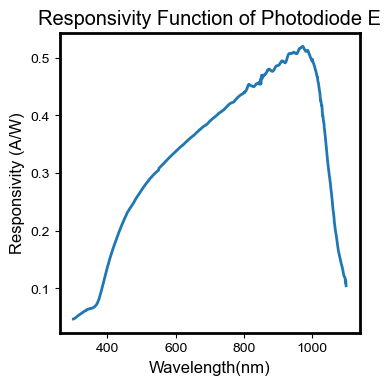

In [687]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(photodiode_data[:,0],photodiode_data[:,3],linewidth=2)

ax.set_xlabel('Wavelength(nm)')
ax.set_ylabel('Responsivity (A/W)')
ax.set_title('Responsivity Function of Photodiode E')
#ax.set_xlim(300,850)
#ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)
plt.show()

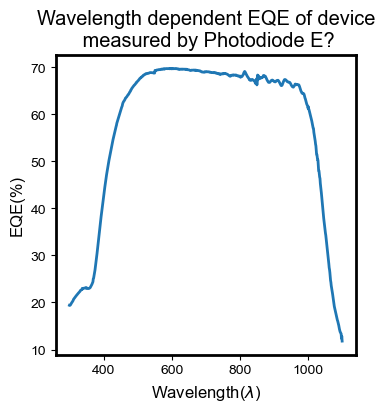

In [661]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(photodiode_data[:,0],photodiode_data[:,2],linewidth=2)

ax.set_xlabel('Wavelength($\lambda$)')
ax.set_ylabel('EQE(%)')
ax.set_title('Wavelength dependent EQE of device\n measured by Photodiode E?')
#ax.set_xlim(300,850)
#ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)
plt.show()

In [666]:
D = 10 #mm distance between sample and photodetector
#A_LED = 4.5 #mm^2
A_LED = math.pi*4**2 #mm^2
A_phd = 100 #mm^2
#treating the LED as a point source as it is much smaller than the photodetector active area

In [667]:
#angle subtended by the photodetector
Omega_phd = 2*math.pi*(1-math.cos(math.sqrt(A_phd/math.pi)/D))
Omega_phd #units sr (The steradian or square radian is the SI unit of solid angle)

0.9737540297496353

In [668]:
#Selecting max EL spectrum to normalize and continue with calculation
Selected_EL_Spectrum = 42
normalized_EL_Spectrum = Spectra[:,Selected_EL_Spectrum+1]/np.amax(Spectra[:,Selected_EL_Spectrum+1])
normalized_EL_Spectra=Spectra
for i in range(numpoints-1): #This is because the 0V column is entirely zeros
    normalized_EL_Spectra[:,i+2] = Spectra[:,i+2]/np.amax(Spectra[:,i+2])

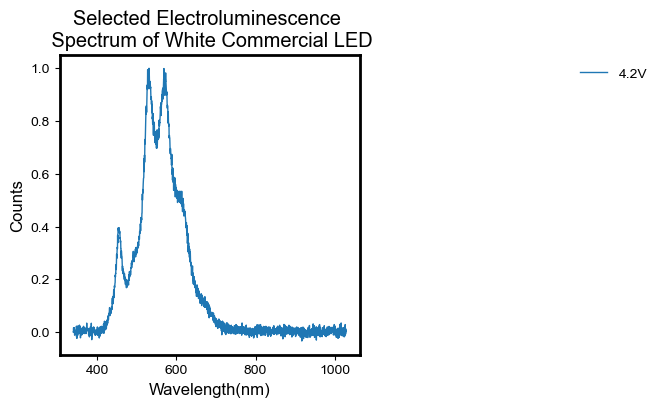

In [669]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(Spectra[:,0],normalized_EL_Spectrum,
             label=f'{IV_EL[Selected_EL_Spectrum,0]}V', linewidth = 1)

ax.set_xlabel('Wavelength(nm)')
ax.set_ylabel('Counts')
ax.set_title('Selected Electroluminescence \n Spectrum of White Commercial LED')
#ax.set_xlim(300,90)
ax.legend(bbox_to_anchor=(2, 1), loc=1, frameon=False, fontsize=10, ncol=3)
#ax.set_xticks(ax.get_xticks()[::2])

plt.show()

#plt.savefig(f'IV+Spectra/{date_string}{Sample_Name}_Spectra.png')

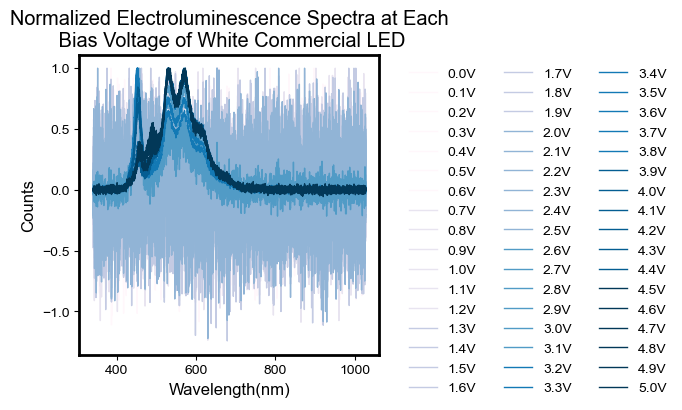

In [670]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

for k in range(numpoints):
    ax.plot(normalized_EL_Spectra[:,0],normalized_EL_Spectra[:,k+1],color = colors(k/numpoints), 
             label=f'{IV_EL[k,0]}V', linewidth = 1)

ax.set_xlabel('Wavelength(nm)')
ax.set_ylabel('Counts')
ax.set_title('Normalized Electroluminescence Spectra at Each\n Bias Voltage of White Commercial LED')
#ax.set_xlim(300,850)
ax.legend(bbox_to_anchor=(2, 1), loc=1, frameon=False, fontsize=10, ncol=3, )
#ax.set_xticks(ax.get_xticks()[::5])
plt.show()

#plt.savefig(f'IV+Spectra/{date_string}{Sample_Name}_Spectra.png')

In [671]:
e=1.602176634e-19 #[C]
h=6.62607015e-34 #[J.s]
c=299792458 #[m.s-1]

In [672]:
#Now attempting to convert from responsivity to quantum efficiency of the photodetector:
calculated_QEs = photodiode_data[:,3]*h*c/(e*photodiode_data[:,0]*1e-9)

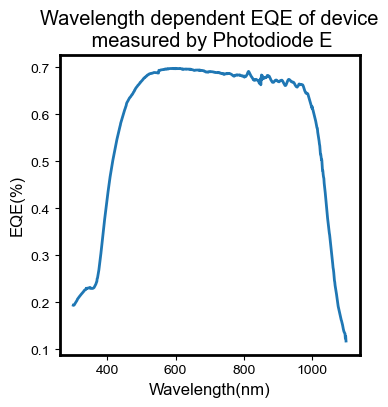

In [686]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(photodiode_data[:,0],calculated_QEs,linewidth=2)

ax.set_xlabel('Wavelength(nm)')
ax.set_ylabel('EQE(%)')
ax.set_title('Wavelength dependent EQE of device\n measured by Photodiode E')
#ax.set_xlim(300,850)
#ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)
plt.show()

In [674]:
#BRAVO! QUANTUM EFFICIENCIES OF PHOTODETECTOR VERIFIED!!!! So now we know the EQE column in the 
#photodiode calibration file are the QEs of the photodetector itself:)

In [675]:
#Photodiode data and spectral data do not have consistent wavelength increments so I will use interpolation

In [676]:
print(np.amin(Spectra[:,0]),
     np.amin(photodiode_data[:,0]),
     np.amax(Spectra[:,0]),
     np.amax(photodiode_data[:,0]))

340.1645356 299.999 1028.2473214321135 1099.994


In [677]:
#Infer QE of photodiode at a specific wavelength using interpolation
#X~wavelength, Y~Photodiode QE
def interpolate(Xmin,Xmax,Y1,Y2,currentXval):
    frac = (currentXval-Xmin)/(Xmax-Xmin)
    y = frac*(Y2-Y1)+Y1
    return y

In [678]:
#Finding lower and upper bounds for interpolation from photodiode array data. 
#Upper bound index will really just turn out to be lower bound +1
def upper_lower(wavelength,array):
    min_index=0
    for i in range(len(array)):
        if array[i,0]<wavelength:
            min_index+=1
            #max_index+=1
    result = min_index-1
    return result

In [723]:
#Doing out the integrals in to calculate C
Cs = np.zeros((numpoints,))
for a in range(numpoints):
    C_numerator = 0
    C_denominator = 0
    for b in range(2047): 
        Xcurrent = normalized_EL_Spectra[b,0]
        Xmin_index = upper_lower(Xcurrent,photodiode_data)
        Xmin = photodiode_data[Xmin_index,0]
        Xmax = photodiode_data[Xmin_index+1,0]
        Ymin = photodiode_data[Xmin_index,2]/100
        Ymax = photodiode_data[Xmin_index+1,2]/100
        QE = interpolate(Xmin,Xmax,Ymin,Ymax,Xcurrent)
        dlambda = normalized_EL_Spectra[b+1,0]-normalized_EL_Spectra[b,0]*1e-9
        C_numerator+=normalized_EL_Spectra[b,a+1]*QE*dlambda
        C_denominator+=normalized_EL_Spectra[b,a+1]*dlambda
    C=C_numerator/C_denominator
    Cs[a]=C

<ipython-input-723-0a8033e38c3d>:17: RuntimeWarning: invalid value encountered in double_scalars
  C=C_numerator/C_denominator


In [680]:
#Note there are some negative C values and this is most likely due to negative spectrum 
#readings from dark-subtracted spectra?

In [724]:
Phi_phd_array = np.zeros((numpoints,))
for a in range(numpoints):
    Phi_phd = IV_EL_array[a,2]/(1000*(Omega_phd*Cs[a])*e)
    Phi_phd_array[a,]=Phi_phd #[photons.s-1.sr-1]

In [725]:
#Adding a column to IV_EL for photon flux:
IV_EL = np.append(IV_EL, np.zeros((numpoints,1)), axis=1)
IV_EL[:,3]=Phi_phd_array #[photons.s-1.sr-1]

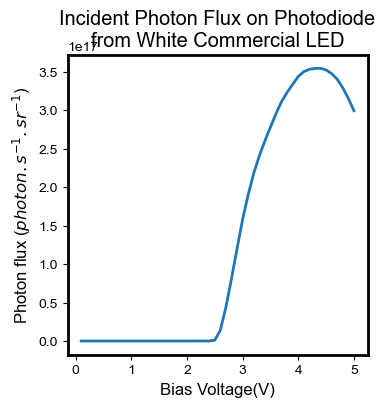

In [726]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(IV_EL[:,0],IV_EL[:,3],linewidth=2)

ax.set_xlabel('Bias Voltage(V)')
ax.set_ylabel('Photon flux ($photon.s^{-1}.sr^{-1}$)')
ax.set_title('Incident Photon Flux on Photodiode\nfrom White Commercial LED')
#ax.set_xlim(300,850)
#ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)
plt.show()

#### Radiance or Radiant Intensity

In [727]:
#Average energy per photon
E_photon_array = np.zeros((numpoints,))
for a in range(numpoints):
    E_numerator = 0
    E_denominator = 0
    for b in range(2047):
        dlambda = normalized_EL_Spectra[b+1,0]-normalized_EL_Spectra[b,0]*1e-9
        wavelength = normalized_EL_Spectra[b,0]*1e-9
        E_numerator+=normalized_EL_Spectra[b,a+1]*h*c*dlambda/wavelength
        E_denominator+=normalized_EL_Spectra[b,a+1]*dlambda
    E_photon=E_numerator/E_denominator   #[J/photon]
    E_photon_array[a]=E_photon

<ipython-input-727-6985e727954d>:11: RuntimeWarning: invalid value encountered in double_scalars
  E_photon=E_numerator/E_denominator   #[J/photon]


In [728]:
E_photon_array

array([            nan,  1.49358315e-19,  2.90231189e-19,  2.67458567e-19,
        3.74807228e-19,  1.53430857e-19,  7.75182440e-19,  3.02320887e-19,
       -9.57919864e-21, -4.69586123e-19, -2.87164831e-20,  2.02136646e-19,
        3.54079921e-19,  2.56854399e-19,  2.47957810e-19,  2.15181591e-19,
        1.41042370e-19,  3.35638723e-19,  2.67091092e-19,  2.19937366e-19,
        2.32742292e-19,  3.46281635e-19,  1.96419357e-19,  3.40919779e-19,
        2.33554138e-19,  3.41913923e-19,  3.66329987e-19,  3.66631152e-19,
        3.65526417e-19,  3.66968999e-19,  3.63352708e-19,  3.62231385e-19,
        3.66571205e-19,  3.64162574e-19,  3.60404273e-19,  3.57896852e-19,
        3.59946336e-19,  3.61565951e-19,  3.58121332e-19,  3.57760628e-19,
        3.59873157e-19,  3.58686717e-19,  3.54366423e-19,  3.51595412e-19,
        3.52237054e-19,  3.53172392e-19,  3.53771766e-19,  3.55773185e-19,
        3.55795559e-19,  3.56138269e-19,  3.55773999e-19])

In [729]:
R_prime = IV_EL[:,3]*E_photon_array  #Radiant Intensity [W.sr-1]
R_prime

array([            nan,  2.98492738e-11,  7.08553988e-11,  2.49333942e-10,
        1.99265492e-10,  1.30452015e-11,  5.78035889e-10,  5.36412629e-11,
       -8.08033579e-12, -5.45746942e-09, -6.33694512e-12, -5.64570030e-11,
        3.07175160e-11,  3.66235698e-11, -3.47815248e-11,  2.83627256e-11,
        9.48410511e-11,  1.97620405e-11,  5.50904324e-11, -1.14947197e-11,
       -6.05725110e-11,  2.16324462e-10,  2.40619773e-09,  1.78075017e-07,
        5.53785242e-06,  3.55993036e-04,  5.09574625e-03,  1.61314950e-02,
        2.95589268e-02,  4.39712093e-02,  5.73566509e-02,  6.87567926e-02,
        7.98435608e-02,  8.75179745e-02,  9.36581661e-02,  9.94059167e-02,
        1.06271590e-01,  1.12445101e-01,  1.15645324e-01,  1.19309848e-01,
        1.23626114e-01,  1.25476114e-01,  1.25061800e-01,  1.24473950e-01,
        1.24771386e-01,  1.24321683e-01,  1.22883522e-01,  1.20980911e-01,
        1.17006762e-01,  1.12180329e-01,  1.06409565e-01])

In [730]:
R = R_prime/(A_LED*1e-6)
R #Radiance [W.sr-1.m-2]

array([            nan,  5.93832435e-07,  1.40962337e-06,  4.96034118e-06,
        3.96426101e-06,  2.59526037e-07,  1.14996586e-05,  1.06715902e-06,
       -1.60753173e-07, -1.08572904e-04, -1.26069517e-07, -1.12317639e-06,
        6.11105564e-07,  7.28602770e-07, -6.91956450e-07,  5.64258497e-07,
        1.88680276e-06,  3.93153304e-07,  1.09598933e-06, -2.28680183e-07,
       -1.20505182e-06,  4.30363842e-06,  4.78697828e-05,  3.54268990e-03,
        1.10172073e-01,  7.08225642e+00,  1.01376650e+02,  3.20925897e+02,
        5.88056165e+02,  8.74779415e+02,  1.14107431e+03,  1.36787293e+03,
        1.58843717e+03,  1.74111478e+03,  1.86327001e+03,  1.97761788e+03,
        2.11420610e+03,  2.23702421e+03,  2.30069062e+03,  2.37359401e+03,
        2.45946338e+03,  2.49626798e+03,  2.48802547e+03,  2.47633056e+03,
        2.48224786e+03,  2.47330130e+03,  2.44468999e+03,  2.40683875e+03,
        2.32777557e+03,  2.23175673e+03,  2.11695104e+03])

In [731]:
#Adding a column to IV_EL for radiance:
IV_EL = np.append(IV_EL, np.zeros((numpoints,1)), axis=1)
IV_EL[:,4]=R #columns: V, I, Iphd, Photon Flux, Radiance

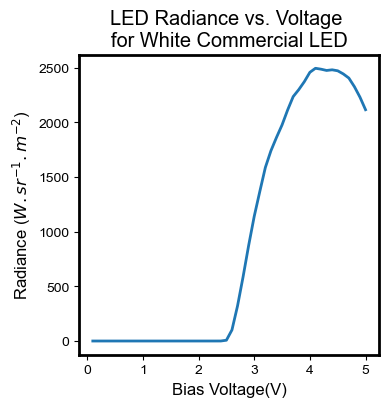

In [732]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(IV_EL[:,0],IV_EL[:,4],linewidth=2)

ax.set_xlabel('Bias Voltage(V)')
ax.set_ylabel('Radiance ($W.sr^{-1}.m^{-2}$)')
ax.set_title('LED Radiance vs. Voltage \nfor White Commercial LED')
#ax.set_xlim(300,850)
#ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)
plt.show()

#### External Quantum Efficiency

In [733]:
math.pi

3.141592653589793

In [734]:
#Lambertian distribution leads to photon flux
phi = math.pi*Phi_phd_array  #[photons.s-1]

In [735]:
EQE_array = np.zeros((numpoints,))
for a in range(numpoints):
    EQE = phi[a]/(IV_EL[a,1]/(1000*e))
    EQE_array[a] = EQE*100 #%
EQE_array

array([            nan,  8.53686537e+02,  1.46884843e+02, -1.21960715e+03,
        5.59860306e+02,  1.27734410e+02,  1.99610889e+03,  4.39315778e+02,
        1.84808922e+03,  3.41603633e+04,  5.73652482e+02, -5.19842449e+02,
        1.61164434e+02,  2.03402767e+02, -1.07128303e+02,  4.51667526e+01,
        1.28782900e+02,  6.89267011e+00,  1.53587653e+01, -1.75124383e+00,
       -2.40755503e+00,  1.53350479e+00,  6.04246701e+00,  2.51033731e+01,
        4.41153751e+01,  6.11504133e+01,  6.43104844e+01,  6.33958837e+01,
        6.18902815e+01,  6.03936893e+01,  5.81684970e+01,  5.45117522e+01,
        5.09917506e+01,  4.71973749e+01,  4.37960555e+01,  4.08386200e+01,
        3.84131488e+01,  3.62185307e+01,  3.39828904e+01,  3.19970007e+01,
        3.02799998e+01,  2.85375289e+01,  2.68092592e+01,  2.51949818e+01,
        2.37552156e+01,  2.23577722e+01,  2.09953942e+01,  1.96457625e+01,
        1.82403901e+01,  1.68412746e+01,  1.54728882e+01])

In [736]:
IV_EL = np.append(IV_EL, np.zeros((numpoints,1)), axis=1)
IV_EL[:,5]=EQE_array #columns: V, I, Iphd, Photon Flux, Radiance, EQE

In [737]:
#Adding a column for J [mA.cm-2]
IV_EL = np.append(IV_EL, np.zeros((numpoints,1)), axis=1)
IV_EL[:,6]=IV_EL[:,1]/(A_LED*1e-2) #columns: V, I, Iphd, Photon Flux, Radiance, EQE, J

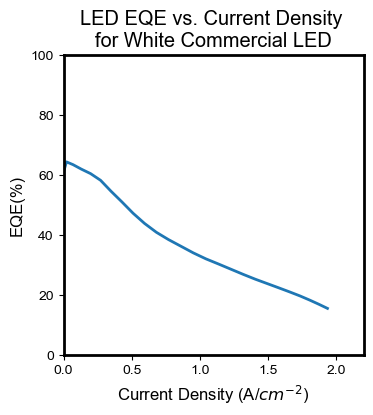

In [738]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(IV_EL[:,6]/1000,IV_EL[:,5],linewidth=2)

ax.set_xlabel('Current Density (A/$cm^{-2}$)')
ax.set_ylabel('EQE(%)')
ax.set_title('LED EQE vs. Current Density \nfor White Commercial LED')
ax.set_xlim(0,2.2)
ax.set_ylim(0,100)
#ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)
plt.show()

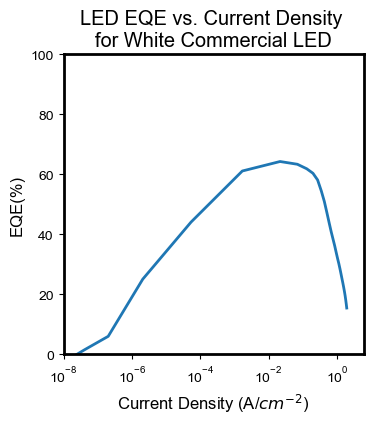

In [739]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(IV_EL[:,6]/1000,IV_EL[:,5],linewidth=2)

ax.set_xlabel('Current Density (A/$cm^{-2}$)')
ax.set_ylabel('EQE(%)')
ax.set_title('LED EQE vs. Current Density \nfor White Commercial LED')
ax.set_xlim(1e-8,1+5)
ax.set_ylim(0,100)
#ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)

ax.set_xscale('log') #as opposed to 'linear'
plt.show()

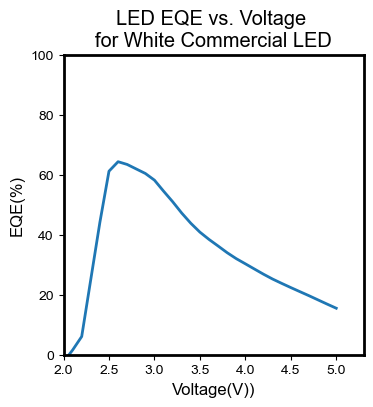

In [833]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(IV_EL[:,0],IV_EL[:,5],linewidth=2)

ax.set_xlabel('Voltage(V))')
ax.set_ylabel('EQE(%)')
ax.set_title('LED EQE vs. Voltage \nfor White Commercial LED')
ax.set_xlim(2,5.3)
ax.set_ylim(0,100)
#ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)

#ax.set_xscale('log') #as opposed to 'linear'
plt.show()

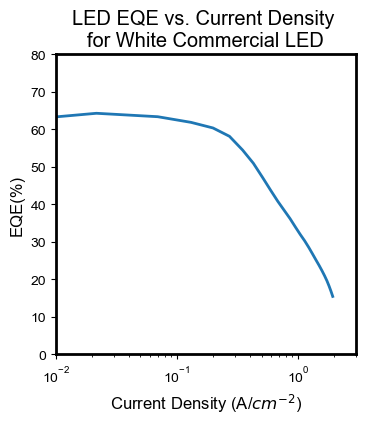

In [740]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(IV_EL[:,6]/1000,IV_EL[:,5],linewidth=2)

ax.set_xlabel('Current Density (A/$cm^{-2}$)')
ax.set_ylabel('EQE(%)')
ax.set_title('LED EQE vs. Current Density \nfor White Commercial LED')
ax.set_xlim(1e-2,1+2)
ax.set_ylim(0,80)
#ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)

ax.set_xscale('log') #as opposed to 'linear'
plt.show()

#### Luminance and current efficacy

In [741]:
#Phototopic curve
phototopic = pd.read_csv('IV+Spectra/StranksPhototopicLuminosityFunction.csv',header=None).to_numpy()
phototopic

array([[3.90000000e+02, 4.14616053e-04],
       [3.90100000e+02, 4.22727711e-04],
       [3.90200000e+02, 4.30990466e-04],
       ...,
       [8.29800000e+02, 7.13516479e-07],
       [8.29900000e+02, 7.09438496e-07],
       [8.30000000e+02, 7.05386046e-07]])

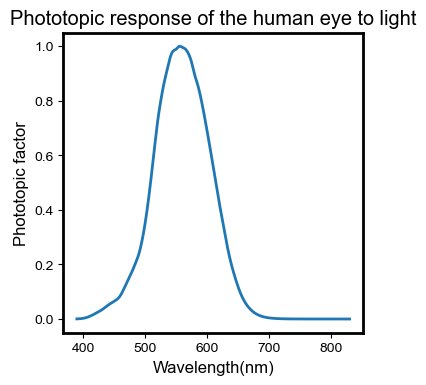

In [742]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(phototopic[:,0],phototopic[:,1],linewidth=2)

ax.set_xlabel('Wavelength(nm)')
ax.set_ylabel('Phototopic factor')
ax.set_title('Phototopic response of the human eye to light')
#ax.set_xlim(1e-5,1e3+5000)
#ax.set_ylim(0,100)
#ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)

#ax.set_xscale('log') #as opposed to 'linear'
plt.show()

In [743]:
#The above is normalized - it needs to be scaled by ~683.002 lm·W-1 before being used in further calcs 
phototopic_scaling = 683.002 #lm·W-1

In [744]:
#In order to take into account the perception of light by the human eye we weight the S(𝜆) by the
#photopic function 𝑃(𝜆).
Ks = np.zeros((numpoints,))
for a in range(numpoints):
    K_numerator = 0
    K_denominator = 0
    for b in range(2047): 
        if normalized_EL_Spectra[b,0]>np.amin(phototopic[:,0]) and normalized_EL_Spectra[b,0]<np.amax(phototopic[:,0]):
            Xcurrent = normalized_EL_Spectra[b,0]
            Xmin_index = upper_lower(Xcurrent,phototopic)
            Xmin = phototopic[Xmin_index,0]
            Xmax = phototopic[Xmin_index+1,0]
            Ymin = phototopic[Xmin_index,1]
            Ymax = phototopic[Xmin_index+1,1]
            response = interpolate(Xmin,Xmax,Ymin,Ymax,Xcurrent)
            dlambda = normalized_EL_Spectra[b+1,0]-normalized_EL_Spectra[b,0]*1e-9
            K_numerator+=response*phototopic_scaling*normalized_EL_Spectra[b,a+1]*h*c*dlambda/(Xcurrent*1e-9)
            K_denominator+=normalized_EL_Spectra[b,a+1]*dlambda
    K=K_numerator/K_denominator
    Ks[a]=K

<ipython-input-744-0ec2583dd98f>:19: RuntimeWarning: invalid value encountered in double_scalars
  K=K_numerator/K_denominator


In [745]:
Ks #lm.s.photon^-1

array([            nan,  6.18997352e-17,  1.22405912e-16,  9.22115664e-16,
        6.33820487e-18,  4.80984577e-16,  2.35547024e-17,  6.90943300e-17,
        2.41699110e-16, -1.38565595e-16,  5.21591282e-17, -4.23183636e-16,
        1.02073391e-16, -3.95761572e-18,  3.26424459e-17,  1.93358413e-16,
        2.16113203e-16,  1.33522204e-16,  4.47823984e-17,  1.00554646e-16,
        1.10029387e-16,  4.24919976e-17,  1.34426040e-16,  1.28725244e-16,
        1.24433815e-16,  1.20641337e-16,  1.33690142e-16,  1.36663107e-16,
        1.37870440e-16,  1.38234686e-16,  1.42595219e-16,  1.45117558e-16,
        1.38112537e-16,  1.41796278e-16,  1.47603337e-16,  1.51097984e-16,
        1.47757705e-16,  1.45133297e-16,  1.49072017e-16,  1.51388392e-16,
        1.47591253e-16,  1.49632510e-16,  1.55731531e-16,  1.59770765e-16,
        1.58098209e-16,  1.57127088e-16,  1.56191251e-16,  1.53770146e-16,
        1.53145337e-16,  1.53423451e-16,  1.52037633e-16])

In [746]:
#Luminous intensity 
L_prime = np.zeros((numpoints,))
for a in range(numpoints):
    L_prime[a] = Phi_phd_array[a]*Ks[a]
L_prime

array([            nan,  1.23706681e-08,  2.98834862e-08,  8.59627480e-07,
        3.36969358e-09,  4.08949074e-08,  1.75642051e-08,  1.22595139e-08,
        2.03880308e-07, -1.61039150e-06,  1.15100979e-08,  1.18195688e-07,
        8.85517883e-09, -5.64296411e-10, -4.57881944e-09,  2.54862490e-08,
        1.45320894e-07,  7.86164120e-09,  9.23685501e-09, -5.25534831e-09,
       -2.86357764e-08,  2.65450361e-08,  1.64676047e-06,  6.72379585e-05,
        2.95047697e-03,  1.25609029e-01,  1.85966495e+00,  6.01307396e+00,
        1.11491320e+01,  1.65636508e+01,  2.25092149e+01,  2.75454261e+01,
        3.00825503e+01,  3.40774257e+01,  3.83576414e+01,  4.19674928e+01,
        4.36244089e+01,  4.51356889e+01,  4.81386619e+01,  5.04866231e+01,
        5.07015669e+01,  5.23445812e+01,  5.49602458e+01,  5.65630197e+01,
        5.60024348e+01,  5.53109597e+01,  5.42534279e+01,  5.22896414e+01,
        5.03633044e+01,  4.83269973e+01,  4.54734144e+01])

In [754]:
##Cross checking using second method of calculation
L_prime2 = np.zeros((numpoints,))
for a in range(numpoints):
    L_prime2[a] = Ks[a]*IV_EL[a,2]*1e-3/(e*Cs[a]*Omega_phd)

In [748]:
IV_EL = np.append(IV_EL, np.zeros((numpoints,1)), axis=1)
IV_EL[:,7]=L_prime #columns: V, I, Iphd, Photon Flux, Radiance, EQE, J, Luminous intensity (cd)

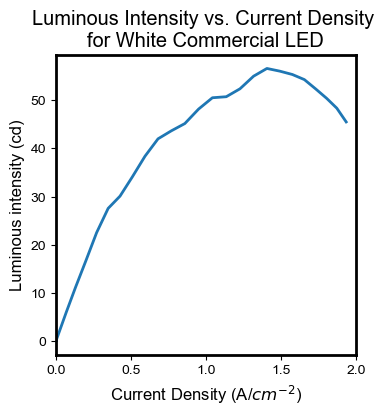

In [755]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(IV_EL[:,6]/1000,IV_EL[:,7],linewidth=2)

ax.set_xlabel('Current Density (A/$cm^{-2}$)')
ax.set_ylabel('Luminous intensity (cd)')
ax.set_title('Luminous Intensity vs. Current Density \nfor White Commercial LED')
ax.set_xlim(0,2)
#ax.set_ylim(0,2e-16)
#ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)

#ax.set_xscale('log') #as opposed to 'linear'
plt.show()

In [756]:
L= L_prime/(A_LED*1e-6) #[cd.m-2]

In [757]:
IV_EL = np.append(IV_EL, np.zeros((numpoints,1)), axis=1)
IV_EL[:,8]=L #columns: V, I, Iphd, Photon Flux, Radiance, EQE, J, Luminous intensity (cd), Luminance (cd/m^2),

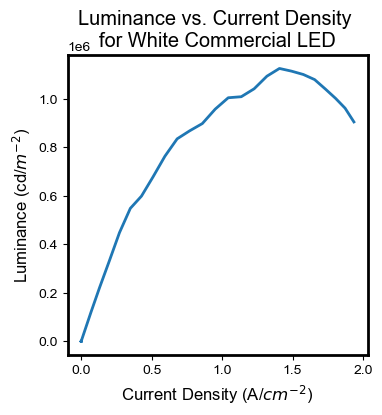

In [758]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(IV_EL[:,6]/1000,IV_EL[:,8],linewidth=2)

ax.set_xlabel('Current Density (A/$cm^{-2}$)')
ax.set_ylabel('Luminance (cd/$m^{-2}$)')
ax.set_title('Luminance vs. Current Density \nfor White Commercial LED')
#ax.set_xlim(0,2000)
#ax.set_ylim(0,2e-16)
#ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)

#ax.set_xscale('log') #as opposed to 'linear'
plt.show()

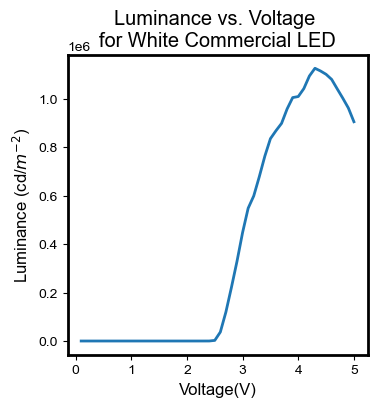

In [759]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(IV_EL[:,0],IV_EL[:,8],linewidth=2)

ax.set_xlabel('Voltage(V)')
ax.set_ylabel('Luminance (cd/$m^{-2}$)')
ax.set_title('Luminance vs. Voltage \nfor White Commercial LED')
#ax.set_xlim(0,2000)
#ax.set_ylim(0,2e-16)
#ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)

#ax.set_xscale('log') #as opposed to 'linear'
plt.show()

In [766]:
#columns: V, I, Iphd, Photon Flux, Radiance, EQE, J, Luminous intensity (cd), Luminance (cd/m^2),
#luminous efficacy 
eta_current = np.zeros((numpoints,))
eta_lum = np.zeros((numpoints,))
for a in range(numpoints):
    eta_c= Ks[a]*IV_EL[a,2]/(e*IV_EL[a,1]*Cs[a]*Omega_phd)
    eta_current[a]=eta_c
    eta_l= math.pi*Ks[a]*IV_EL[a,2]*1e-3/(e*Cs[a]*Omega_phd*IV_EL[a,0]*IV_EL[a,1]*1e-3)
    eta_lum[a]=eta_l

In [767]:
#Cross checking using second calculation method
eta_current2=L_prime/(IV_EL[:,1]*1e-3)

In [771]:
#Cross checking using second method
eta_lum2 = L_prime*math.pi/(IV_EL[:,0]*IV_EL[:,1]*1e-3)

In [774]:
IV_EL = np.append(IV_EL, np.zeros((numpoints,1)), axis=1)
IV_EL[:,9]=eta_current 
#columns: V, I, Iphd, Photon Flux, Radiance, EQE, J, Luminous intensity (cd), Luminance (cd/m^2), 
#eta_current (cd/A), eta_lum (lm/electricalW)


In [775]:
IV_EL = np.append(IV_EL, np.zeros((numpoints,1)), axis=1)
IV_EL[:,10]=eta_lum #columns: V, I, Iphd, Photon Flux, Radiance, EQE, J, Luminous intensity (cd), Luminance (cd/m^2),

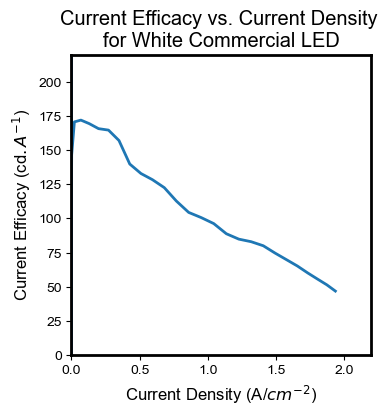

In [781]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(IV_EL[:,6]/1000,IV_EL[:,9],linewidth=2)

ax.set_xlabel('Current Density (A/$cm^{-2}$)')
ax.set_ylabel('Current Efficacy (cd$.A^{-1}$)')
ax.set_title('Current Efficacy vs. Current Density \nfor White Commercial LED')
ax.set_xlim(0,2.2)
ax.set_ylim(0,220)
#ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)

#ax.set_xscale('log') #as opposed to 'linear'
plt.show()

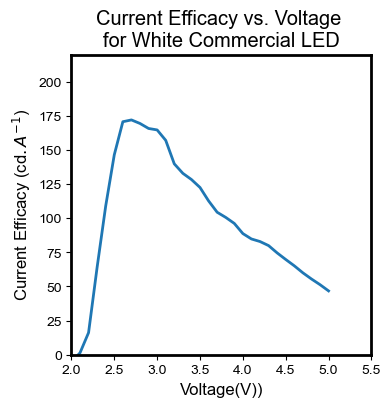

In [827]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(IV_EL[:,0],IV_EL[:,9],linewidth=2)

ax.set_xlabel('Voltage(V))')
ax.set_ylabel('Current Efficacy (cd$.A^{-1}$)')
ax.set_title('Current Efficacy vs. Voltage \nfor White Commercial LED')
ax.set_xlim(2.0,5.5)
ax.set_ylim(0,220)
#ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)

#ax.set_xscale('log') #as opposed to 'linear'
plt.show()

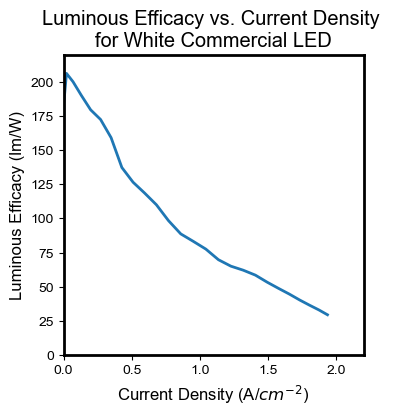

In [779]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(IV_EL[:,6]/1000,IV_EL[:,10],linewidth=2)

ax.set_xlabel('Current Density (A/$cm^{-2}$)')
ax.set_ylabel('Luminous Efficacy (lm/W)')
ax.set_title('Luminous Efficacy vs. Current Density \nfor White Commercial LED')
ax.set_xlim(0,2.2)
ax.set_ylim(0,220)
#ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)

#ax.set_xscale('log') #as opposed to 'linear'
plt.show()

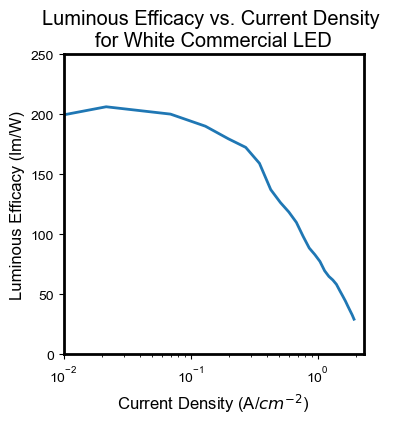

In [785]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(IV_EL[:,6]/1000,IV_EL[:,10],linewidth=2)

ax.set_xlabel('Current Density (A/$cm^{-2}$)')
ax.set_ylabel('Luminous Efficacy (lm/W)')
ax.set_title('Luminous Efficacy vs. Current Density \nfor White Commercial LED')
ax.set_xlim(1e-2,2.3)
ax.set_ylim(0,250)
#ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)

ax.set_xscale('log') #as opposed to 'linear'
plt.show()

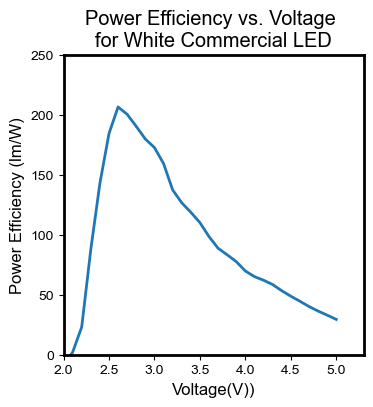

In [835]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(IV_EL[:,0],IV_EL[:,10],linewidth=2)

ax.set_xlabel('Voltage(V))')
ax.set_ylabel('Power Efficiency (lm/W)')
ax.set_title('Power Efficiency vs. Voltage \nfor White Commercial LED')
ax.set_xlim(2,5.3)
ax.set_ylim(0,250)
#ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)

#ax.set_xscale('log') #as opposed to 'linear'
plt.show()

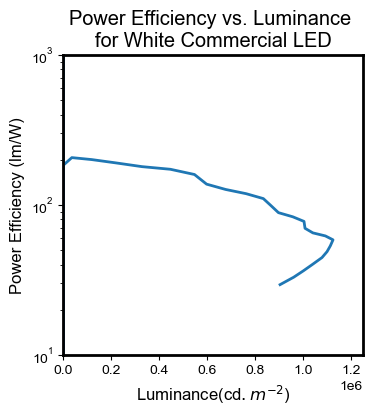

In [848]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(IV_EL[:,8],IV_EL[:,10],linewidth=2)

ax.set_xlabel('Luminance(cd$.m^{-2}$)')
ax.set_ylabel('Power Efficiency (lm/W)')
ax.set_title('Power Efficiency vs. Luminance \nfor White Commercial LED')
ax.set_xlim(0,1.25e6)
ax.set_ylim(10,10**3)
#ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)

ax.set_yscale('log') #as opposed to 'linear'
plt.show()

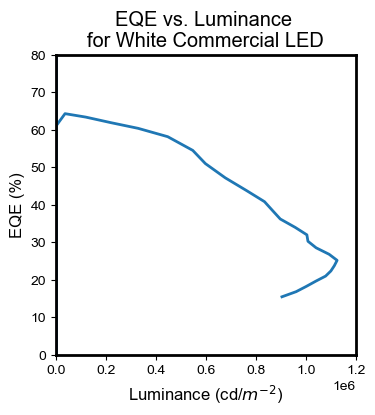

In [795]:
#luminance vs EQE

fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(IV_EL[:,8],IV_EL[:,5],linewidth=2)

ax.set_xlabel('Luminance (cd/$m^{-2}$)')
ax.set_ylabel('EQE (%)')
ax.set_title('EQE vs. Luminance \nfor White Commercial LED')
ax.set_xlim(0,1.2e6)
ax.set_ylim(0,80)
#ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)

#ax.set_xscale('log') #as opposed to 'linear'
plt.show()

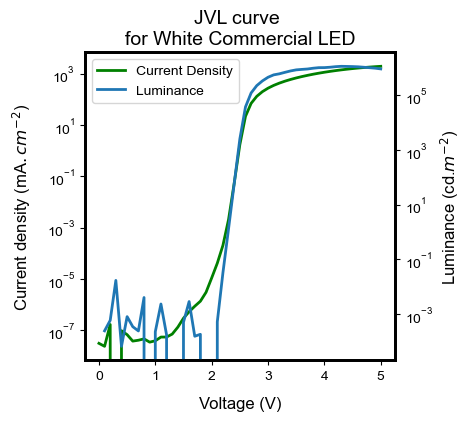

In [818]:
#Now plotting a JVL curve
fig, ax1 = plt.subplots(figsize=(4, 4))
ax2 = ax1.twinx()

line1, = ax1.plot(IV_EL[:,0],IV_EL[:,6],linewidth=2, color ='green', label = 'Current Density')
line2, = ax2.plot(IV_EL[:,0],IV_EL[:,8],linewidth=2, label = 'Luminance')

ax1.legend(handles=[line1, line2], fontsize = 10)

ax1.set_xlabel(r'Voltage (V)', labelpad=10)
ax1.set_ylabel('Current density (mA$.cm^{-2}$)', labelpad=10)
ax1.set_title('JVL curve \nfor White Commercial LED', fontsize = 14)
ax2.set_ylabel('Luminance (cd.$m^{-2}$)')

ax1.set_yscale('log')
ax2.set_yscale('log')
plt.show()

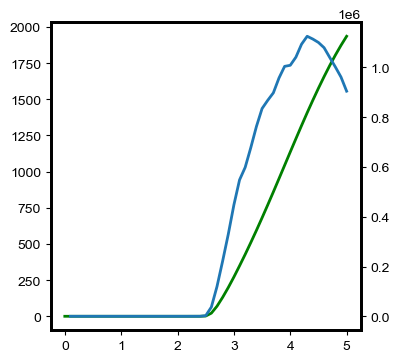

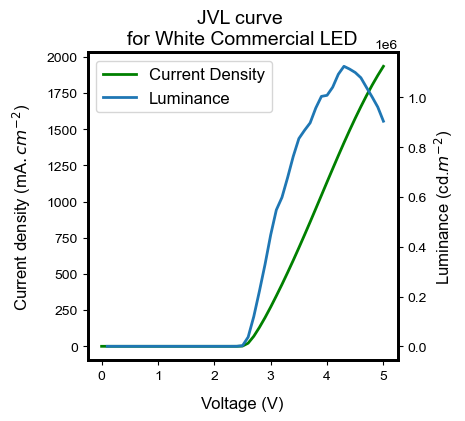

In [811]:
#Now plotting a JVL curve
fig, ax1 = plt.subplots(figsize=(4, 4))
ax2 = ax1.twinx()

line1, = ax1.plot(IV_EL[:,0],IV_EL[:,6],linewidth=2, color ='green', label = 'Current Density')
line2, = ax2.plot(IV_EL[:,0],IV_EL[:,8],linewidth=2, label = 'Luminance')

ax1.legend(handles=[line1, line2])

ax1.set_xlabel(r'Voltage (V)', labelpad=10)
ax1.set_ylabel('Current density (mA$.cm^{-2}$)', labelpad=10)
ax1.set_title('JVL curve \nfor White Commercial LED', fontsize = 14)
ax2.set_ylabel('Luminance (cd.$m^{-2}$)')

plt.show()

In [796]:
#Conbine all figs into one and savefig

In [489]:
#### Luminance and current efficacy 

In [6]:
spectra_path = '../../20220518/run47spectra.txt'
spectra = pd.read_csv(r'../../20220518/run47spectra.txt', sep='\t')
spectra

,Wavelength (nm),Intensity Light (Counts),Intensity Light (Counts) Stdev,Intensity Corrected (Counts)
0,0.000000V,NaN,NaN,NaN
1,3.401645E+2,623.0506,25.50003,22.937250
2,3.405422E+2,623.0506,25.50003,22.937250
3,3.409199E+2,623.0506,25.50003,22.937250
4,3.412975E+2,528.0249,24.30103,8.425929
...,...,...,...,...
94387,1.027962E+3,624.4549,40.98946,-14.043210
94388,1.028247E+3,634.2852,24.09729,3.276750
94389,NaN,NaN,NaN,NaN
94390,Integration Time (s) =,0.0005,NaN,NaN


In [7]:
integration_time = spectra.iloc[len(spectra)-2,1]
integration_time

0.0005

In [8]:
stringA = "V"
file0 = open(spectra_path, "r")
i = 0
j = 0
voltage_rows = np.zeros((len(JV),2))
for line in file0:  
    i += 1
    # checking string is present in line or not
    if stringA in line:
        voltage_rows[j,0] = line[:6]
        voltage_rows[j,1] = i
        print("New voltage line", i)
        print(line)
        j+=1
print(voltage_rows)
#This array shows voltages in column 0 and their respective rows in column 1

New voltage line 2
0.000000V

New voltage line 2054
0.100000V

New voltage line 4106
0.200000V

New voltage line 6158
0.300000V

New voltage line 8210
0.400000V

New voltage line 10262
0.500000V

New voltage line 12314
0.600000V

New voltage line 14366
0.700000V

New voltage line 16418
0.800000V

New voltage line 18470
0.900000V

New voltage line 20522
1.000000V

New voltage line 22574
1.100000V

New voltage line 24626
1.200000V

New voltage line 26678
1.300000V

New voltage line 28730
1.400000V

New voltage line 30782
1.500000V

New voltage line 32834
1.600000V

New voltage line 34886
1.700000V

New voltage line 36938
1.800000V

New voltage line 38990
1.900000V

New voltage line 41042
2.000000V

New voltage line 43094
2.100000V

New voltage line 45146
2.200000V

New voltage line 47198
2.300000V

New voltage line 49250
2.400000V

New voltage line 51302
2.500000V

New voltage line 53354
2.600000V

New voltage line 55406
2.700000V

New voltage line 57458
2.800000V

New voltage line 59510

In [9]:
dist_between_voltages = int(voltage_rows[1,1]-voltage_rows[0,1])
Nwavelengths = int(voltage_rows[1,1]-voltage_rows[0,1]-4)
spectra_array = np.zeros((Nwavelengths,2,j))

In [10]:
len(voltage_rows)

46

In [11]:
for k in range(0,len(voltage_rows)):
    spectrum = pd.read_csv(spectra_path,sep='\t', header=None,skiprows = 2+k*dist_between_voltages, skipfooter = ((len(voltage_rows)-k-1)*dist_between_voltages+3))
    spectrum = spectrum.to_numpy()
    spectra_array[:,0,k] = spectrum[:,0]
    spectra_array[:,1,k] = spectrum[:,3]

<ipython-input-11-0eb109d35e84>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  spectrum = pd.read_csv(spectra_path,sep='\t', header=None,skiprows = 2+k*dist_between_voltages, skipfooter = ((len(voltage_rows)-k-1)*dist_between_voltages+3))


In [12]:
spectra_array[:,:,0]   

array([[ 340.1645 ,   22.93725],
       [ 340.5422 ,   22.93725],
       [ 340.9199 ,   22.93725],
       ...,
       [1027.677  ,  -26.214  ],
       [1027.962  ,  -12.63889],
       [1028.247  ,   25.27779]])

In [13]:
#https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html
#https://matplotlib.org/3.5.0/tutorials/colors/colormap-manipulation.html
colors = cm.get_cmap('PuBu', 8)
print(colors(0.56))

(0.31596638655462184, 0.6067226890756302, 0.7781512605042017, 1.0)


<Figure size 640x480 with 0 Axes>

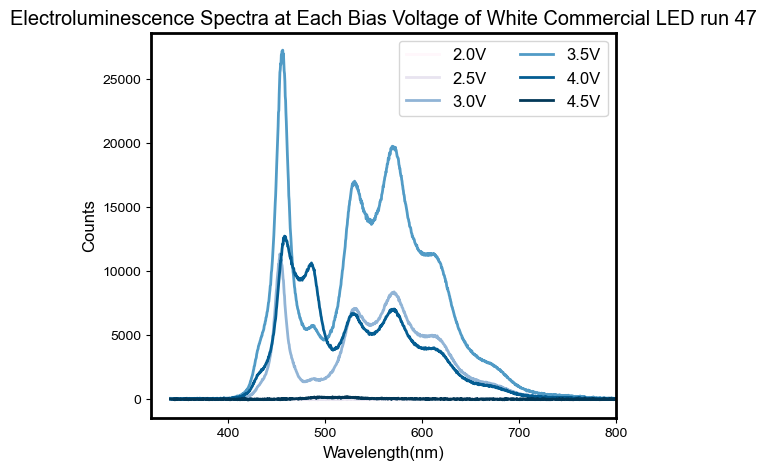

In [44]:
plt.figure(figsize=(6,5))
selected_spectra = np.arange(20,46,5)
for k in selected_spectra:
    plt.plot(spectra_array[:,0,k],spectra_array[:,1,k],color = colors((k-20)/25), 
             label=f'{voltage_rows[k,0]}V', linewidth = 2)
plt.legend(loc='upper right', ncol = 2)
plt.title(f'Electroluminescence Spectra at Each Bias Voltage of White Commercial LED run {run}')
plt.ylabel('Counts')
plt.xlabel('Wavelength(nm)')
plt.xlim(320,800)
plt.show()
plt.savefig(f'Spectra_vs_voltage_run{run}.png')

<Figure size 640x480 with 0 Axes>

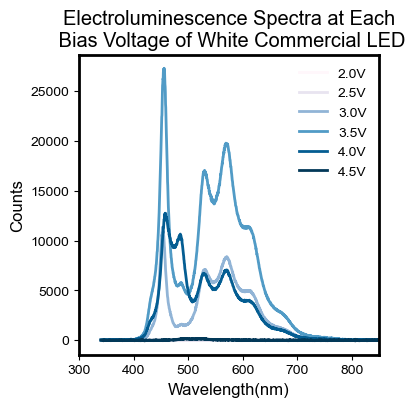

In [50]:
plt.rc('font', family='Arial')
plt.rcParams['axes.linewidth'] = 2
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
plt.rcParams['font.size'] = 12

fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

for k in selected_spectra:
    ax.plot(spectra_array[:,0,k],spectra_array[:,1,k],color = colors((k-20)/25), 
             label=f'{voltage_rows[k,0]}V', linewidth = 2)

ax.set_xlabel('Wavelength(nm)')
ax.set_ylabel('Counts')
ax.set_title('Electroluminescence Spectra at Each\n Bias Voltage of White Commercial LED')
ax.set_xlim(300,850)
ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)
plt.show()

plt.savefig('Electroluminescence Spectra at Each\n Bias Voltage of White Commercial LED', dpi=300, transparent=False, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

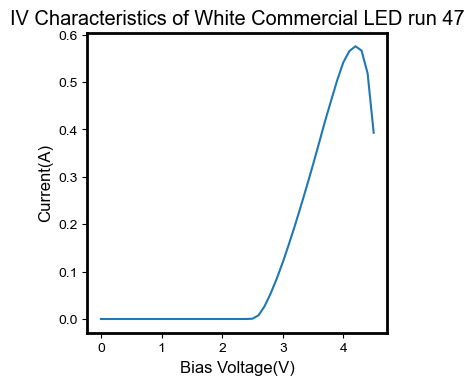

In [46]:
JV_array = JV.to_numpy()
plt.plot(JV_array[:,0],JV_array[:,1])
plt.title(f'IV Characteristics of White Commercial LED run {run}')
plt.ylabel('Current(A)')
plt.xlabel('Bias Voltage(V)')
plt.show()
#alternatively,
#JV.plot(x='Bias (V)',y='Diode Current(A)')
plt.savefig(f'IV_characteristics_run{run}.png')

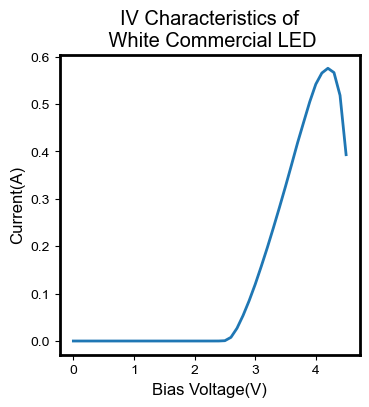

In [49]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(JV_array[:,0],JV_array[:,1],linewidth=2)

ax.set_xlabel('Bias Voltage(V)')
ax.set_ylabel('Current(A)')
ax.set_title('IV Characteristics of\n White Commercial LED')
#ax.set_xlim(300,850)
#ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)
plt.show()
plt.savefig('IV Characteristics of\n White Commercial LED', dpi=300, transparent=False, bbox_inches='tight')

In [69]:
#assume illumination coming from entire bead
area = math.pi*0.004**2
area

5.0265482457436686e-05

In [64]:
len(spectra_array)

2048

In [66]:
#Try calculating EQE in a more intuitive way...
e=1.602176634e-19 #C
h=6.62607015e-34 #J.Hz-1
c=299792458 #ms-1
EQE_array = np.zeros((len(JV),3))
EQE_array[:,0] = JV_array[:,0] 
EQE_array[:,1] = JV_array[:,1] 

for k in range(0,len(voltage_rows)):
    electron_input = JV_array[:,1]/e
    photon_output = 0
    counts_sum=0
    for m in range(len(spectra_array)):
        counts_sum+=spectra_array(m,1,k)
        photon_output = 
    EQE_array[k,2] = photon_output/electron_input

In [62]:
#EQE calculation
#Assuming for the mean time that the responsivity function R(lambda)=1
#also not accounting for f



for k in range(0,len(voltage_rows)):
    numerator = 0
    denominator = 0
    denom_integral = 0
    R_lambda=0
    I_OLED = JV_array[k,1]
    for m in range(len(spectra_array)):
        wavelength = spectra_array[m,0,k]
        counts = spectra_array[m,1,k]
        Idet = counts*e/integration_time
        numerator+=wavelength*1e-9*Idet
        eta_det = h*c/(e*wavelength*1e-9)
        denom_integral+=wavelength*1e-9*eta_det
    denominator=I_OLED*denom_integral
    EQE_array[k,2]=numerator/denominator
EQE_array

array([[ 0.00000000e+00,  1.46621500e-12, -1.50238829e-04],
       [ 1.00000000e-01,  6.30382700e-12, -9.45989614e-06],
       [ 2.00000000e-01,  7.00069900e-12, -8.94794101e-06],
       [ 3.00000000e-01,  8.28263900e-12, -1.16801092e-05],
       [ 4.00000000e-01,  1.08718600e-11, -1.72972322e-06],
       [ 5.00000000e-01,  1.24436700e-11, -1.72403649e-05],
       [ 6.00000000e-01,  2.17425300e-11, -3.72036302e-06],
       [ 7.00000000e-01,  2.47895900e-11, -1.38315063e-06],
       [ 8.00000000e-01,  3.38188300e-11, -1.91639614e-06],
       [ 9.00000000e-01,  4.55085200e-11, -8.52885282e-06],
       [ 1.00000000e+00,  6.59019100e-11,  5.16329330e-07],
       [ 1.10000000e+00,  1.06897300e-10,  1.66569583e-06],
       [ 1.20000000e+00,  1.85220500e-10, -3.81305011e-07],
       [ 1.30000000e+00,  2.88057300e-10, -2.17616228e-07],
       [ 1.40000000e+00,  4.28277800e-10,  3.58289575e-07],
       [ 1.50000000e+00,  6.14570600e-10,  1.16208067e-07],
       [ 1.60000000e+00,  1.06673100e-09

In [ ]:
#Luminance calculation

In [46]:
#Spectral Peakfinding (imperfect here since the peak is saturated)
max_points = np.zeros((len(voltage_rows),5))
max_points[:,0]=voltage_rows[:,0]
for k in range(0,len(voltage_rows)):
    max_counts = np.max(spectra_array[:,1,k])
    max_position = np.asarray(np.where(spectra_array[:,1,k] == np.max(spectra_array[:,1,k]))).flatten()
    #print(max_position)
    max_points[k,1]=spectra_array[max_position[0],0,k]
    max_points[k,2]=spectra_array[max_position[0],1,k]
    #Accounting for second maxima?
    if len(max_position)==2:
        max_points[k,3]=spectra_array[max_position[1],0,k]
        max_points[k,4]=spectra_array[max_position[1],1,k]

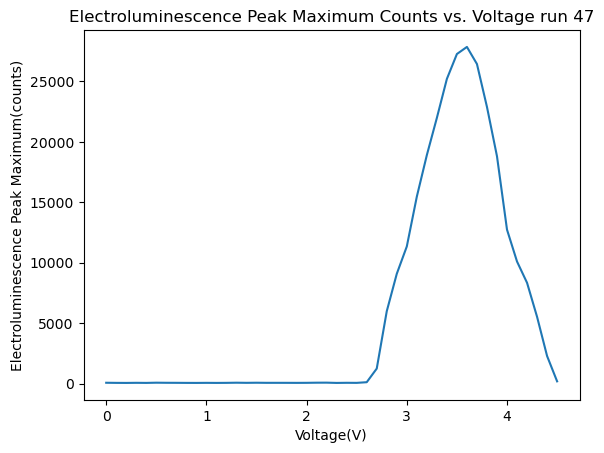

In [38]:
plt.plot(max_points[:,0],max_points[:,2])
plt.xlabel("Voltage(V)")
plt.ylabel("Electroluminescence Peak Maximum(counts)")
plt.title(f"Electroluminescence Peak Maximum Counts vs. Voltage run {run}")
plt.show()

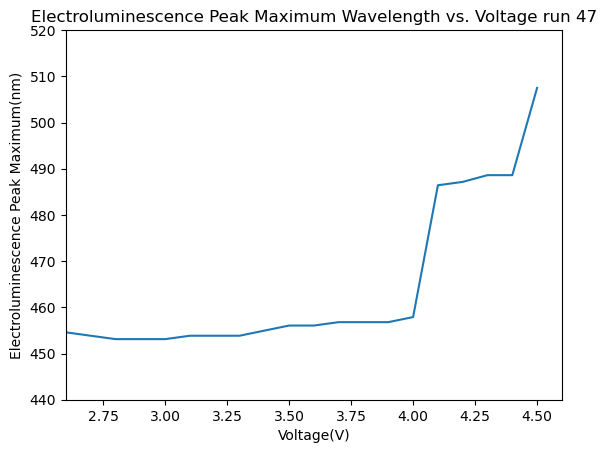

In [45]:
plt.plot(max_points[:,0],max_points[:,1])
plt.xlabel("Voltage(V)")
plt.ylabel("Electroluminescence Peak Maximum(nm)")
plt.title(f"Electroluminescence Peak Maximum Wavelength vs. Voltage run {run}")
plt.xlim(2.6,4.6)
plt.ylim(440,520)
plt.show()

In [48]:
#FWHM Calculation - from the web
'''from scipy.interpolate import splrep, sproot, splev

class MultiplePeaks(Exception): pass
class NoPeaksFound(Exception): pass

def fwhm(x, y, k=10):
    """
    Determine full-with-half-maximum of a peaked set of points, x and y.

    Assumes that there is only one peak present in the datasset.  The function
    uses a spline interpolation of order k.
    """

    half_max = amax(y)/2.0
    s = splrep(x, y - half_max, k=k)
    roots = sproot(s)

    if len(roots) > 2:
        raise MultiplePeaks("The dataset appears to have multiple peaks, and "
                "thus the FWHM can't be determined.")
    elif len(roots) < 2:
        raise NoPeaksFound("No proper peaks were found in the data set; likely "
                "the dataset is flat (e.g. all zeros).")
    else:
        return abs(roots[1] - roots[0])'''

'from scipy.interpolate import splrep, sproot, splev\n\nclass MultiplePeaks(Exception): pass\nclass NoPeaksFound(Exception): pass\n\ndef fwhm(x, y, k=10):\n    """\n    Determine full-with-half-maximum of a peaked set of points, x and y.\n\n    Assumes that there is only one peak present in the datasset.  The function\n    uses a spline interpolation of order k.\n    """\n\n    half_max = amax(y)/2.0\n    s = splrep(x, y - half_max, k=k)\n    roots = sproot(s)\n\n    if len(roots) > 2:\n        raise MultiplePeaks("The dataset appears to have multiple peaks, and "\n                "thus the FWHM can\'t be determined.")\n    elif len(roots) < 2:\n        raise NoPeaksFound("No proper peaks were found in the data set; likely "\n                "the dataset is flat (e.g. all zeros).")\n    else:\n        return abs(roots[1] - roots[0])'